In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [11]:
Beth_DF = pd.read_csv('labelled_training_data.csv')

In [12]:
Beth_DF

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,1809.495787,381,7337,1,100,4026532231,close,ip-10-100-1-120,157,prctl,"[140662171848350, 11649800180280676]",5,0,"[{'name': 'option', 'type': 'int', 'value': 'P...",1,0
1,1809.495832,381,7337,1,100,4026532231,close,ip-10-100-1-120,3,close,[140662171777451],1,0,"[{'name': 'fd', 'type': 'int', 'value': 19}]",1,0
2,1809.495921,381,7337,1,100,4026532231,close,ip-10-100-1-120,1010,sched_process_exit,[],0,0,[],1,0
3,1894.139651,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,21,access,[],2,-2,"[{'name': 'pathname', 'type': 'const char*', '...",1,0
4,1894.142127,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,1005,security_file_open,"[139778263990104, 139778263906698]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763139,324.542553,7274,7274,7108,0,4026531840,sshd,ip-10-100-1-79,1003,cap_capable,[],1,0,"[{'name': 'cap', 'type': 'int', 'value': 'CAP_...",0,0
763140,324.542579,7274,7274,7108,0,4026531840,sshd,ip-10-100-1-79,62,kill,[],2,0,"[{'name': 'pid', 'type': 'pid_t', 'value': 0},...",0,0
763141,324.543178,7274,7274,7108,0,4026531840,sshd,ip-10-100-1-79,1010,sched_process_exit,[],0,0,[],0,0
763142,324.543695,7275,7275,1,109,4026531840,sshd,ip-10-100-1-79,1010,sched_process_exit,[],0,0,[],0,0


In [6]:
Beth_DF.shape

(763144, 16)

array([[<Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'processId'}>,
        <Axes: title={'center': 'threadId'}>],
       [<Axes: title={'center': 'parentProcessId'}>,
        <Axes: title={'center': 'userId'}>,
        <Axes: title={'center': 'mountNamespace'}>],
       [<Axes: title={'center': 'eventId'}>,
        <Axes: title={'center': 'argsNum'}>,
        <Axes: title={'center': 'returnValue'}>],
       [<Axes: title={'center': 'sus'}>,
        <Axes: title={'center': 'evil'}>, <Axes: >]], dtype=object)

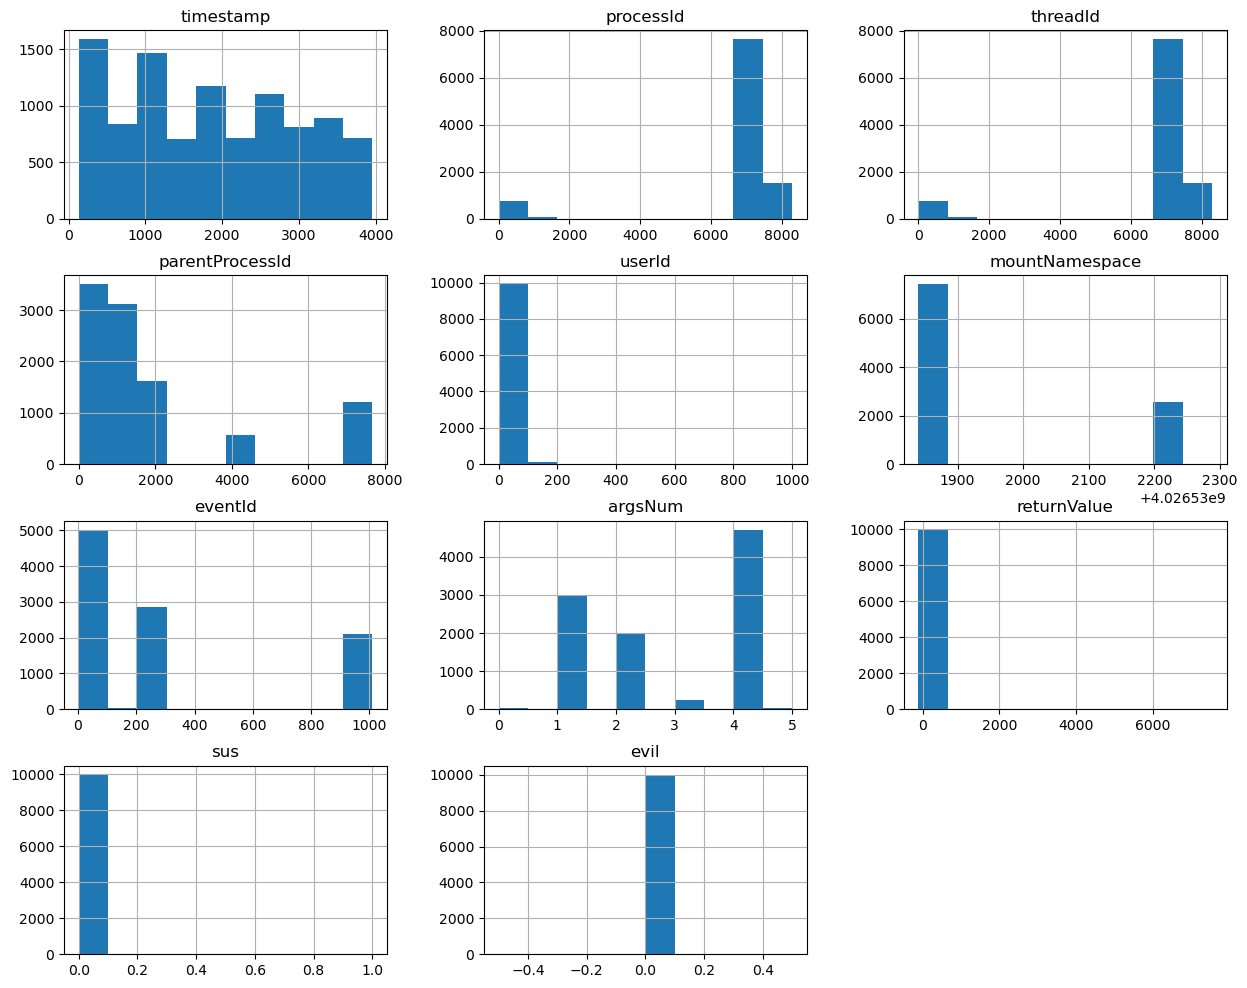

In [9]:
Beth_DF.sample(10000).hist(figsize=(15,12))

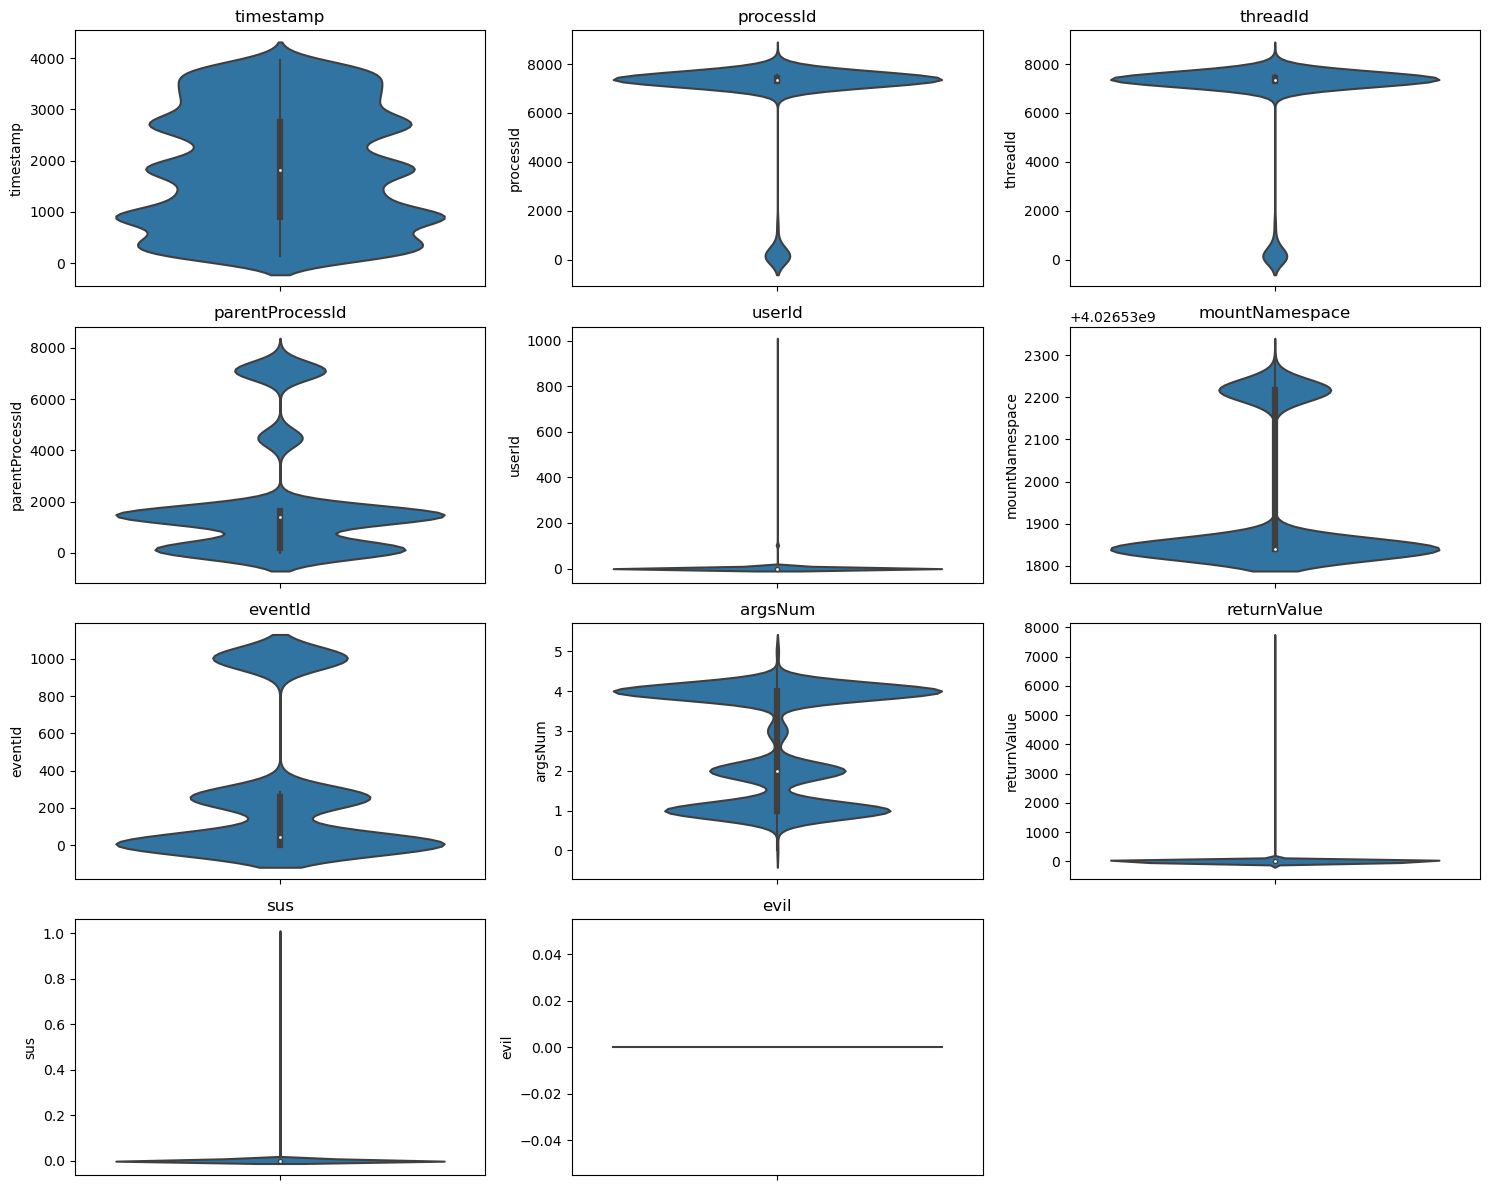

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_violin_plots(df, sample_size=10000, figsize=(15, 12)):
    sampled_df = df.sample(min(sample_size, len(df))) # prevent sample size from being larger than the dataframe.
    numerical_cols = sampled_df.select_dtypes(include=['number']).columns

    num_cols = len(numerical_cols)
    if num_cols == 0:
      print("No numerical columns found in the DataFrame.")
      return
    rows = (num_cols + 2) // 3 #calculate the number of rows needed
    cols = min(3, num_cols) #calculate the number of columns needed.

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten() #flattens the axes so that they can be easily iterated.

    for i, col in enumerate(numerical_cols):
        sns.violinplot(y=sampled_df[col], ax=axes[i])
        axes[i].set_title(col)

    # Remove empty subplots if needed
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage (assuming Beth_DF is your DataFrame):
create_violin_plots(Beth_DF)

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_swarmplots(df, x_col, numerical_cols, sample_size=1000, figsize=(15, 12)):
    if x_col not in df.columns:
        print(f"Error: Categorical column '{x_col}' not found.")
        return

    for col in numerical_cols:
      if col not in df.columns:
        print(f"Error: Numerical column '{col}' not found.")
        return

    sampled_df = df.sample(min(sample_size, len(df)))

    num_cols = len(numerical_cols)
    rows = (num_cols + 2) // 3
    cols = min(3, num_cols)

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.swarmplot(x=sampled_df[x_col], y=sampled_df[col], ax=axes[i])
        axes[i].set_title(f"{col} by {x_col}")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

numerical_cols = Beth_DF.select_dtypes(include=['number']).columns
categorical_cols = Beth_DF.select_dtypes(exclude=['number']).columns
create_swarmplots(Beth_DF.sample(10000), categorical_cols[0], numerical_cols[0])

Error: Numerical column 't' not found.


In [14]:
Beth_DF.columns

Index(['timestamp', 'processId', 'threadId', 'parentProcessId', 'userId',
       'mountNamespace', 'processName', 'hostName', 'eventId', 'eventName',
       'stackAddresses', 'argsNum', 'returnValue', 'args', 'sus', 'evil'],
      dtype='object')

In [15]:
Beth_DF.corr

<bound method DataFrame.corr of           timestamp  processId  threadId  parentProcessId  userId  \
0       1809.495787        381      7337                1     100   
1       1809.495832        381      7337                1     100   
2       1809.495921        381      7337                1     100   
3       1894.139651       7347      7347             7341       0   
4       1894.142127       7347      7347             7341       0   
...             ...        ...       ...              ...     ...   
763139   324.542553       7274      7274             7108       0   
763140   324.542579       7274      7274             7108       0   
763141   324.543178       7274      7274             7108       0   
763142   324.543695       7275      7275                1     109   
763143   324.543831       7108      7108                1       0   

        mountNamespace processName         hostName  eventId  \
0           4026532231       close  ip-10-100-1-120      157   
1          

Correlation Matrix:
                 timestamp  processId  threadId  parentProcessId    userId  \
timestamp         1.000000   0.008400  0.009125         0.299987 -0.043992   
processId         0.008400   1.000000  0.997469         0.264867 -0.172854   
threadId          0.009125   0.997469  1.000000         0.264324 -0.173622   
parentProcessId   0.299987   0.264867  0.264324         1.000000 -0.032717   
userId           -0.043992  -0.172854 -0.173622        -0.032717  1.000000   
mountNamespace   -0.270486   0.019634  0.018492        -0.452629  0.012523   
eventId           0.060280   0.006453  0.006377         0.068502 -0.013893   
argsNum           0.035247   0.037779  0.037600         0.029078 -0.013313   
returnValue      -0.001652  -0.090281 -0.088028        -0.018629 -0.000506   
sus              -0.048987  -0.100869 -0.097394        -0.009972  0.856705   
evil                   NaN        NaN       NaN              NaN       NaN   

                 mountNamespace   eventId  

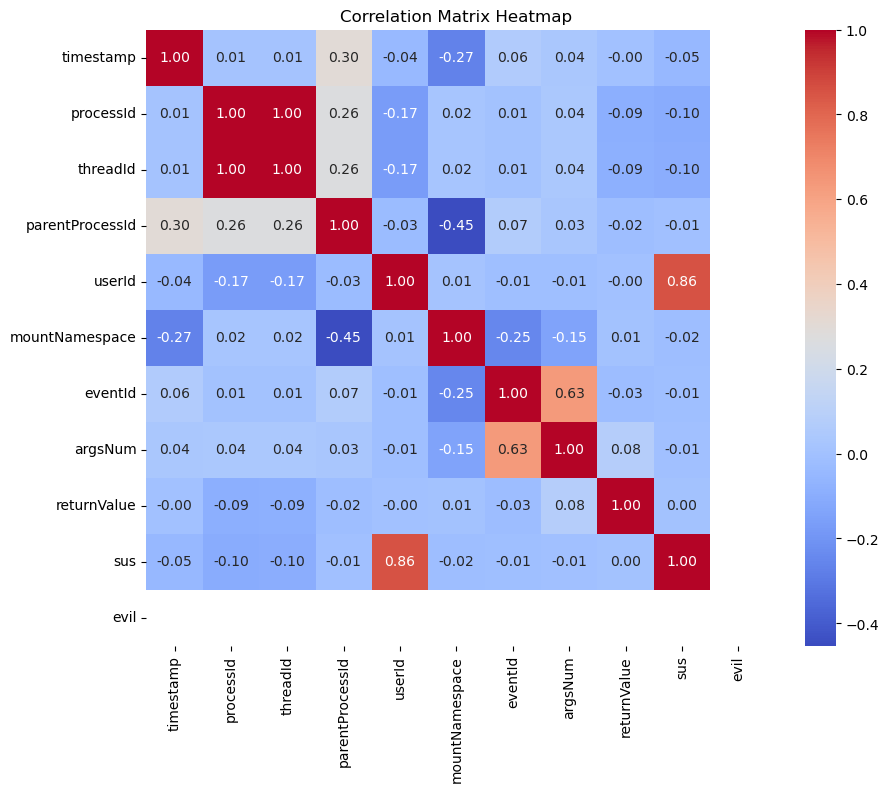

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def print_correlation_matrix(df, figsize=(10, 8)):
    numerical_df = df.select_dtypes(include=['number'])

    if numerical_df.empty:
        print("No numerical columns found in the DataFrame.")
        return

    correlation_matrix = numerical_df.corr()

    # Print the correlation matrix (optional)
    print("Correlation Matrix:")
    print(correlation_matrix)

    # Display the correlation matrix as a heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

# Example usage (assuming Beth_DF is your DataFrame):
print_correlation_matrix(Beth_DF)